<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Statistical Learning and Regression
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2020</b> <br>
    <b>Lab01.01 - 19/05/2020<br>
    Marco Cannici <br>
    <a href="mailto:marco.cannici@polimi.it">marco.cannici@polimi.it</a>
        <p style="height:1pt"></p>
    &#8618; <a href="http://tiny.cc/ML2020Lab01">tiny.cc/ML2020Lab01</a>
    </div>
    </td>
    <td width="100px"> 
        <a href="http://tiny.cc/ML2020Lab01">
        <img align="right", width="100px" src='https://chart.googleapis.com/chart?cht=qr&chl=http://tiny.cc/ML2020Lab01&chs=180x180&choe=UTF-8&chld=L|0' alt=''>
        </a>
    </td>
</tr>
</table>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

import os
from urllib import request

DATA_URL = "https://raw.githubusercontent.com/marcocannici/ml2020-scikit-course/master/lab01/data/mpg_data_processed.csv"
DATA_PATH = "data/mpg_data_processed.csv"

if not os.path.exists(DATA_PATH):
    os.makedirs(os.path.dirname(DATA_PATH), exist_ok=True)
    request.urlretrieve(DATA_URL, DATA_PATH)

np.random.seed(0)

## MPG (Miles per Gallon) dataset

The MPG dataset relates cars (and their characteristics) with their efficiency in terms of miles per gallon. Regression task: given the cars characteristics, we want to predict its mpg value. 

In [ ]:
# Reads the dataset from csv
mpg = pd.read_csv('data/mpg_data_processed.csv')
mpg.head()

We can now remove the 'name' column, since it doesn't provide much information, and split the table into ***X***, features, and ***y***, target, numpy arrays.

In [ ]:
# Removes column named 'name'
mpg = #...
mpg = #...
# Make sure features are floats
mpg = #...

In [ ]:
# Plot a pair plot showing each variable vs. every other
# using seaborn pairplot utility
#...

In [ ]:
# Plot displacement vs mpg
#...
# Plot horsepower vs mpg
#...
# Plot weight vs mpg
#...

### Split data

We can now split data into training and test sets

In [ ]:
# Split X and y
# X all the columns except 'mpg'
X_all_features = ['cylinders', 'displacement', 'horsepower',
                  'weight', 'acceleration', 'model_year', 'origin']
X_pd = mpg[...]
# y just the 'mpg' column
y_pd = mpg[...]

print("X.shape", X_pd.shape)
print("X.dtype\n", X_pd.dtypes)
print("y.shape", y_pd.shape)
print("y.dtype\n", y_pd.dtypes)

In [ ]:
from sklearn.model_selection import train_test_split

mpg_test_size = 0.3
mpg_test_seed = 40
# Split X and y into train and test
X_train_pd, X_test_pd, y_train_pd, y_test_pd = #...

print("X_train.shape ", X_train_pd.shape)
print("X_test.shape ", X_test_pd.shape)

# Simple Linear Regression - Recap

Linear Regression assumes that there is approximately a linear relationship between $X$ and $Y$, where $X$ is the set of features (or attributes) of each sample, and $Y$ is the variable (or the variables) we want to predict.

Mathematically we can write:  $Y \approx \beta_0 + \beta_1 X$

For example, X may represent 'weight' advertising and Y may represent 'mpg'. We can therefore define our model of the data as $mpg \approx \beta_0 + \beta_1 weight$. Regressing mpg onto weight means to find the parameters $\beta_0$ and $\beta_1$ that better describe the data based on some goodness measure. That is to find a _slope_ and an _intercept_ such that the resulting line is as close as possible to the data points.

Once we have used our training data to produce our estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ for the model coefficients, we can predict future mpg based on a particular value of weight.

### Least Squares

The most common method to find a solution for the linear regression problem is the least squares algorithm. 

Let $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$ be the model prediction (i.e., the predicted mpg) given a certain car weight $x_i$.

$e_i = y_i - \hat{y_i}$ is the residual error, that is the difference between the actual value $y_i$ and the predicted one $\hat{y_i}$.

Least squares finds a solution that minimizes the residual sum of squares of all training data, RSS.

$RSS = e_1^2 + e_2^2 + \dots + e_N^2 = \sum_i (y_i - \hat{y_i})^2 = \sum_{i=1}^N (y_i - \hat{\beta_0} - \hat{\beta_1}x_i)^2$

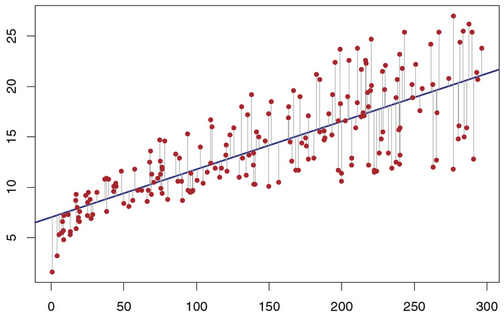

### Least Squares solution

We can compute the partial derivatives of RSS with respect to the model parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ and equate them to 0. If we then solve for the model parameters, we will find the minimum/maximum of the RSS function. In principle, we may have to check if the value for the parameters we just computed is actually a minimum by computing the second order derivative, however, we know that the RSS function is **globally convex**, meaning that there exist a single stationary point which is a minimum! Therefore, the value $\hat{\beta_0}$ and $\hat{\beta_1}$ are those that **minimize** the RSS for all training points.

$\hat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}} \quad\quad$
 $\hat{\beta}_{0}=\overline{y}-\hat{\beta}_{1} \overline{x}$

### Least Squares solution of $mpg \approx \beta_0 + \beta_1 weight$

In [ ]:
# Select the features (i.e., X)
X_train = X_train_pd['weight'].to_numpy()
X_test = X_test_pd['weight'].to_numpy()
# Select the corrsponding target value (i.e., y)
y_train = y_train_pd.to_numpy()
y_test = y_test_pd.to_numpy()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
def least_squares(X, y):
    # Compute the means
    X_mean = #...
    y_mean = #...
    # Compute \hat{\beta_1}
    beta_hat_1 = #...
    # Compute \hat{\beta_0}
    beta_hat_0 = #...
    return beta_hat_0, beta_hat_1

def LS_predict(X, beta0, beta1):
    return #...

def rss(y_predict, y_true):
    RSS = #...
    return RSS

beta_hat_0, beta_hat_1 = least_squares(X_train, y_train)
print("Estimates: beta0 = {}, beta1 = {}".format(beta_hat_0, beta_hat_1))

# Compute the RSS
y_predict = #...
train_RSS = rss(y_predict, y_train)

y_predict = #...
test_RSS = rss(y_predict, y_test)

print("Train RSS = {}".format(train_RSS))
print("Test RSS = {}".format(test_RSS))

In [ ]:
# Plot the solution using matplotlib
# First plot the points
plt.scatter(X_test, y_test, marker='.', color='g', label="test")
plt.scatter(X_train, y_train, marker='.', color='r', label="train")

# Then plot the line
# We select two points to connect (x1=0, y1=beta0) 
# and (x2=X.max(), y2=beta0 + x2*beta1)
X_fake = #...
y_fake = #...
plt.plot(..., ..., color='b')
plt.legend()


### Standard error: a measure of the accuracy of the coefficient estimates

We can compute the accuracy of an estimator by computing its **variance** or **standard error**. It tells us the average distance between the estimate and the actual value.

$\operatorname{SE}\left(\hat{\beta}_{0}\right)^{2}=\sigma^{2}\left[\frac{1}{n}+\frac{\overline{x}^{2}}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}\right]
\quad\quad
\operatorname{SE}\left(\hat{\beta}_{1}\right)^{2}=\frac{\sigma^{2}}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}
\quad\quad
\sigma^2= Var(\epsilon) \approx RSE^2$

Notice that the estimate for $\beta_1$ is more precise as the data are more spread out (denominator), i.e., the $x_i$ are more distant from the mean. Intuitively, this means that if the data cover a larger interval of the x-axis, we have more leverage to estimate the slope.

The variance of the error $\sigma^2= Var(\epsilon)$ is potentially unknown. However, we can compute an astimate from data called **residual standard error**, $\mathrm{RSE}=\sqrt{\mathrm{RSS} /(n-2)}$.

In [ ]:
def rse(y_true, y_predict):
    RSS = #...
    RSE2 = #...
    RSE = #...
    return RSE

# Compute the standard error of \beta_0 and \beta_1
n = X_train.shape[0]
X_mean = X_train.mean()

y_predict = LS_predict(X_train, beta_hat_0, beta_hat_1)
RSE = rse(y_predict, y_train)
print("RSE =", RSE)

se2_beta_0 = #...
se2_beta_1 = #...

print("SE(beta_0)^2 = {} \nSE(beta_1)^2 = {}".format(se2_beta_0, se2_beta_1))

The standard error for the $\beta_1$ parameter is actually very small, so we expect the model to be quite accurate on predicting the slope.

### Confidence intervals for the parameters

The standard errors can be used to compute __confidence intervals__ and __hypothesis tests__ for variables correlations.
In particular, we know that the value $t=\frac{\hat{\beta}_{i}-\beta_i}{\operatorname{SE}(\hat{\beta}_{1})}$ *is distributed as a **t-Student** of paramenters $deg=n−p$, where $n$ is the number of observations, and $p$ is the number of parameters used during regression*. The value $deg=n−p$ is usually defined **degree**, or normality value (since as we increase the degree, the distribution tends to the normal distribution).


We start by writing a probability, asking within which are the values of the interval that make this probability equal to a certain fixed valie $1 - \alpha$. We do this in terms of the t-Student statistics, and not directly w.r.t. the actual estimator for which we want to compute the interval since this allows later on to compute those interval values easier. We then reformulate the probability in terms of the estimator an obtain the actual $1-\alpha$ confidence interval we were looking for.

$P\left( -q_{\frac{\alpha}{2}} \leq \frac{\hat{\beta_i} - \beta_i}{SE(\hat{\beta_i})} \leq +q_{\frac{\alpha}{2}}\right) = 1 - \alpha$, 
$\quad P\left( \hat{\beta_i}-q_{\frac{\alpha}{2}} SE(\hat{\beta_i}) \leq \beta_i \leq \hat{\beta_i} +q_{\frac{\alpha}{2}} SE(\hat{\beta_i}) \right) = 1 - \alpha$, $\quad$or
$\quad \left[\hat{\beta_i} - q_{\frac{\alpha}{2}} SE(\beta_i), \hat{\beta_i} + q_{\frac{\alpha}{2}} SE(\beta_i)\right]$

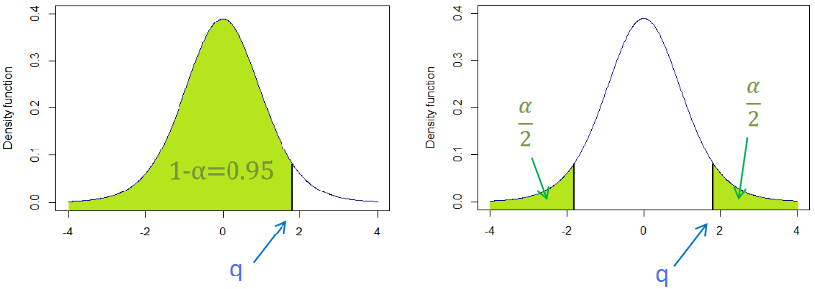

How to compute $q_{\frac{\alpha}{2}}$? 
- We first fix a value for $1 - \alpha$ (e.g., $0.95$)
- We then compute the value for $\frac{\alpha}{2}$ (e.g., $1 - \alpha = 0.95 \rightarrow \alpha = 1 + 0.95 \rightarrow \frac{\alpha}{2} = \frac{1+ 0.95}{2}$)
- We finally compute the value $q_{\frac{\alpha}{2}}$ using the **percent point function** (ppf) (inverse of the comulative probability function, cdf) or tabular values.

A 95% confidence interval is defined as **a range of values such that with $1 - \alpha = 95$% probability, the range will contain the true unknown value of the parameter**



In [ ]:
from scipy.stats import t

deg = n-2
confidence = 0.95
value = t.ppf((1 + confidence) / 2., deg)

# Compute the population regression line
beta_hat_0, beta_hat_1 = least_squares(X_train, y_train)

# Compute the confidence interval for \beta_0
left_beta0 = #...
right_beta0 = #...

# Compute the confidence interval for \beta_1
left_beta1 = #...
right_beta1 = #...

print("The interval [{0:.3f}, {1:.3f}] (size {2:.3f}) contains the true beta_0 with {3}% probability".
     format(left_beta0, right_beta0, right_beta0-left_beta0, 100*confidence))
print("The interval [{0:.3f}, {1:.3f}] (size {2:.3f}) contains the true beta_1 with {3}% probability".
     format(left_beta1, right_beta1, right_beta1-left_beta1, 100*confidence))

## Hypothesis tests on the coefficients

We can use a similar approach to test if a variable depend from another one by setting up the following statistical test:
- $\mathcal{H}_0$: there is **no relationship** between $Y$ and $X$ 
- $\mathcal{H}_a$: there is **some relationship** between $Y$ and $X$ 

If we want to know if there is *statistical evidence* that the observation $Y$ depends on a specific variable $X$ (provided that $Y = f(X) + \epsilon = \beta_0 + \beta_1 X + \epsilon$), we can test whether $\beta_1$ is equal or not to $0$, i.e., 
- $\mathcal{H}_0$: $\beta_1 = 0$ 
- $\mathcal{H}_a$: $\beta_1 \ne 0$ 

#### How do we test if the null hypotesis $\mathcal{H}_0$ is verified? 
We take a sample (i.e., train a regressor in our case) and compute statistics for that sample. Than, fixed a significance level $\alpha$, assuming $\mathcal{H}_0$ is true, we compute *what is the probability of getting a sample with the statistics that we observed*. If that probability is lower that the significance level, then we reject $\mathcal{H}_0$ and say that we have evidence for the alternative.

In practice this translates into:
1. Fix $\alpha$ equal to a small value (0.05, 0.01, 0.005, 0.001)
2. Compute the statistics $\hat{t}=\frac{\hat{\beta}_{i}-\beta_i}{\operatorname{SE}(\hat{\beta}_{1})}$ under the null hypothesis $\rightarrow$ $\mathcal{H}_0$: $\beta_i = 0$ $\rightarrow$ $\hat{t}=\frac{\hat{\beta}_{i}-0}{\operatorname{SE}(\hat{\beta}_{1})}$
3. Compute the probability (p-value), under $\mathcal{H}_0$, of getting a sample with the statistics that we observed (or a more extreme value): 
    - (one-tailed test): $p = P(t \ge \hat{t} \mid \mathcal{H}_0)$ $\rightarrow$ $1 - P(t < \hat{t} \mid \mathcal{H}_0) = 1 - cdf(\hat{t}) = ppf(\hat{t})$
    - (two-tailed test): $p = P(t \ge \hat{t} \hspace{0.25em}\text{or}\hspace{0.25em} t \le -\hat{t} \mid \mathcal{H}_0)$ $\rightarrow$ $2 \cdot (1 - cdf(\hat{|t|})) = 2 \cdot ppf(\hat{|t|})$ <br><br>
    
4. 
    - If $p < \alpha$ $\rightarrow$ Reject $\mathcal{H}_0$ and say that we have evidence for the alternative $\mathcal{H}_a$ (there exists some relationship between $X$ and $y$)
    - If $p \ge \alpha$ $\rightarrow$ Do not reject $\mathcal{H}_0$ (we have no evidence to say that there exists some relationship between $X$ and $y$)


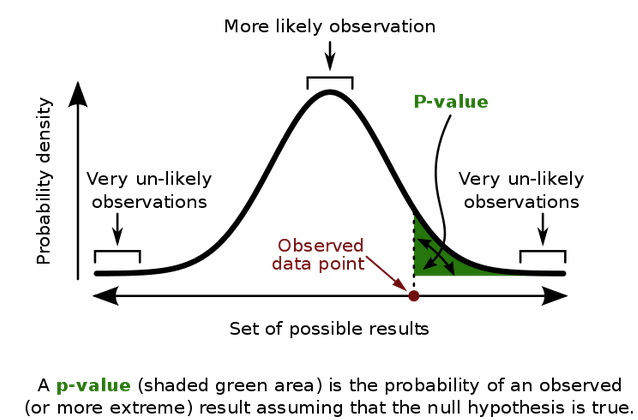

In [ ]:
# Set alpha small
alpha = 0.001
# Compute the t-statistic  under H0
t_stat = #...
# Compute the p-value
# Note: t.sf(...) = 1 - t.cdf(...)
p_val = #...

# Compare the p-vale with alpha
print("beta1 (weight)  t-statistic {0:.2f}, p-value {1}".format(t_stat, p_val))
if p_val < alpha:
    print("Reject H0: A relation between X and y exists")
else:
    print("Not Reject H0: A relation between X and y DOEST NOT exist")

In [ ]:
# Do the same for beta0 (intercept)
t_stat = #...
p_val = #...

# Compare the p-vale with alpha
print("beta0 (intercept)  t-statistic {0:.2f}, p-value {1}".format(t_stat, p_val))

## Multiple Linear Regression

Similarly to the simple linear regression setting, we want to find the values for the models parameters that minimize the residual sum of squares. We consider the following model:

$\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{1}+\hat{\beta}_{2} x_{2}+\cdots+\hat{\beta}_{p} x_{p}$

The Least Squares solution to the problem, in matrix form, is:

$\hat{\beta}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y} \quad\quad$  with $X$ a $N \times (p+1)$ matrix, $y$ a $N \times 1$ vector

$\hat{\mathbf{y}}=\mathbf{X} \hat{\beta}=\mathbf{X}\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y} \quad\quad$  with $\hat{y}$ the predicted value for each sample

In [ ]:
# Select the sample features we want to use
X_train_full = X_train_pd.to_numpy()
X_test_full = X_test_pd.to_numpy()

def multiple_least_squares(X, y):
    # X must be a N x (p+1) matrix representing having in each row (sample)
    # a '1' followed by the samples features
    X = #...
    betas = #...
    # Returns the predictions for convenience
    pred = #...
    return betas, pred

def MLS_predict(X, betas):
    if X.shape[-1] + 1 == betas.size:
        X = #...
    return #...

betas, pred = multiple_least_squares(X_train_full, y_train)

In [ ]:
# Compute the RSS
y_predict = MLS_predict(X_train_full, betas)
train_RSS = rss(y_predict, y_train)

y_predict = MLS_predict(X_test_full, betas)
test_RSS = rss(y_predict, y_test)

print("Train RSS = {}".format(train_RSS))
print("Test RSS = {}".format(test_RSS))

```
Simple Linear regression (weight):

Train RSS = 5402.6171875
Test RSS = 1918.7105712890625
```

In [ ]:
for beta, name in zip(betas, ['intercept']+X_all_features):
    print("beta_{} = {}".format(name, beta))

In the Multiple Linear Regression case, the equation for computing the SE is a little bit different:

$\operatorname{SE}\left(\hat{\beta}\right)^{2}=\sigma^{2} \cdot diag\left((X^TX)^{-1}\right)
\quad\quad
\sigma^2= Var(\epsilon) \approx RSE^2$

In [ ]:
# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = #...

    # Compute the t statistics
    se2_b = #...
    se_b = #...
    t_stat_b = #...

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    
    return df
    
show_stats(X_train_full, y_train, betas, ["Intercept"]+X_all_features, alpha)

By performing t-tests on the coefficients, separately, we can conclude that:
 - We must reject the hypothesis that the observation is not correlated with **weight**, **model_year**, and **origin** features, but,
 - We cannot say the same for **cylinders**, **displacement**, **horsepower** and **acceleration**.

**Notice** that in the multiple linear regression case, a **t-test performed on each variable reports the *partial* effect of adding that variable to a model that uses all features but the considered one**. So not rejecting the null hypothesis on cylinders means that, *in the presence of the remaining features*, there is no evidence that cylinders is associated with the mpg observation.

In [ ]:
X_feat_small = ['weight', 'model_year', 'origin']

X_train_small = X_train_pd[X_feat_small].to_numpy()
X_test_small = X_test_pd[X_feat_small].to_numpy()
betas, _ = multiple_least_squares(X_train_small, y_train)
show_stats(X_train_small, y_train, betas, ['Intercept']+X_feat_small, alpha)

## Hypothesis tests on subsets of coefficients

In the previous analysis we studied separately the impact of adding each feature to the prediction, meaning that we tested if there is evidence that a feature is correlated with the observation. 

How can we study the **combine effect** of multiple features?

For instance, can we say that in the model making use of all features, at **least one feature** is useful in predicting the rensponse? Looking at each t-test we may conclude that, since at least one of the p-values is under the threshold, we can conclude that yes, at least one feature is correlated (actually both TV and Radio).

However, we have to remenber that the tests we perform are **statistical tests**, and therefore that the observation we observe is only due to chance. Ah we compare more and more variables together with t-tests, we are actually increasing this probability. 

**What is the actual probability of making an error by comparing three variables with t-tests?**

In [ ]:
alpha = 0.05

print("P(making a mistake) =", ...)
print("P(not making a mistake) =", ...)
print("P(not making any mistake) =", ...)
print("P(making at least one mistake) =", ...)

Which is is much greater that $\alpha$!

**What about 100 variables?**

In [ ]:
print("P(making at least one mistake) =", ...)

Which means that with 100 input features, we are almost certain to see at least a correlation only due to chance!


### How to reliably test multiple features? 

F-tests are designed specifically for this situation, and they not suffer from the problem we observed on t-tests.
We generally use the F-test in two ways:
1. Checking if **all** the regression parameters are zero.
2. Checking if **a subset of the parameters** are zero.

#### 1- Are all parameters zero?

- $\mathcal{H}_0: \beta_1 = \beta_2 = ... = \beta_p = 0$
- $\mathcal{H}_a:$ at least one $\beta_j$ is non-zero

We proceed as the t-test, but this time we compute for our test the F-statistic $\hat{F} = \frac{(TSS - RSS) / p}{RSS/(n-p-1)}$, 

where $TSS = \sum{(y_i - \overline{y})^2}$, $RSS = \sum{(y_i - \hat{y}_i)^2}$, $n$ is the number of training sample and $p$ the number of model paramentes. Being the ration between two Chi-squared distributions of parameters $p$ and $n-p-1$, respectively, we know that $F$ is distributed as a **Fished distribution** of parameters $p$ and $n-p-1$.

We can perform the same steps as the t-test, but this time considering the Fisher distribution instead on the t-Student:
1. Fix $\alpha$ equal to a small value (0.05, 0.01, 0.005, 0.001)
2. Compute the statistics under the null hypothesis $\rightarrow \hat{F}$
3. Compute the probability (p-value), under $\mathcal{H}_0$, of getting a sample with the statistics that we observed (or a more extreme value):<br>
    $p = P(F \ge \hat{F} \mid \mathcal{H}_0)$ $\rightarrow$ $1 - P(t < \hat{F} \mid \mathcal{H}_0) = 1 - cdf(\hat{F}) = ppf(\hat{F})$
4. 
    - If $p < \alpha$ $\rightarrow$ Reject $\mathcal{H}_0$ and say that we have evidence for the alternative $\mathcal{H}_a$ (at least one parameter is different from 0)
    - If $p \ge \alpha$ $\rightarrow$ Do not reject $\mathcal{H}_0$

#### 2. Are a subset of the parameters zero?

The test is very similar to the previous one, but, again, we have to use a different statistics!

In this tests we distinguish between two models:
- The **complete** model, which is the one in which *all features* are used for prediction
- The **restricted** model, which is the one using *all the variables except $q$ features*

The test translates into:

- $\mathcal{H}_0: \beta_j = ... = 0$ with $\beta_j \in S$
- $\mathcal{H}_a:$ at least one $\beta_j$ is non-zero

$F = \frac{(RSS_r - RSS_c)/q}{RSS_c/(n-p-1)}$

The test we have to do to perform the test are always the same, however, this time F is distributed as a Fisher distribution of paramenters $q$ and $n-p-1$!



In [ ]:
from scipy.stats import f

def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    betas_complete, y_pred = multiple_least_squares(X_complete, y)
    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = #...
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = #...
    F_den = #...
    F = #...

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [ ]:
features = ['cylinders', 'displacement', 'horsepower', 'acceleration']
p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha:
    print("Reject H0: There evidence to say that at least one of the {} features is useful".format(features))
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the {} features is useful".format(features))

**Note:** Some of the test we performed in this lecture can also be performed using the statsmodel package, with however less control on the underlying testing procedure. Here you can see t-tests and F-test performed on the same example. 

In [ ]:
import statsmodels.api as sm

X_complete_intercept = np.concatenate([np.ones([X_train_full.shape[0], 1]), X_train_full], axis=-1)
ols_model = sm.OLS(y_train.reshape(-1), X_complete_intercept)
ols_results = ols_model.fit()
ols_results.summary()

Compare it with our results:
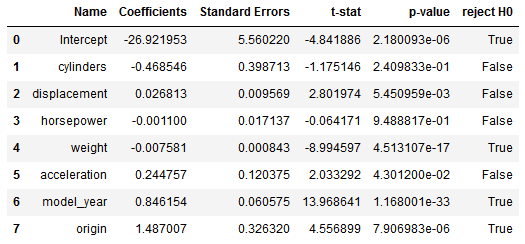